,thresholds,FPR,TPR
0,1.984190,0.000000,0.000000
1,0.984190,0.000000,0.006410
2,0.854333,0.000000,0.153846
3,0.853510,0.006944,0.153846
4,0.851913,0.006944,0.166667
...,...,...,...
113,0.121816,0.916667,0.980769
114,0.121588,0.916667,0.987179
115,0.078231,0.979167,0.987179
116,0.076312,0.979167,1.000000


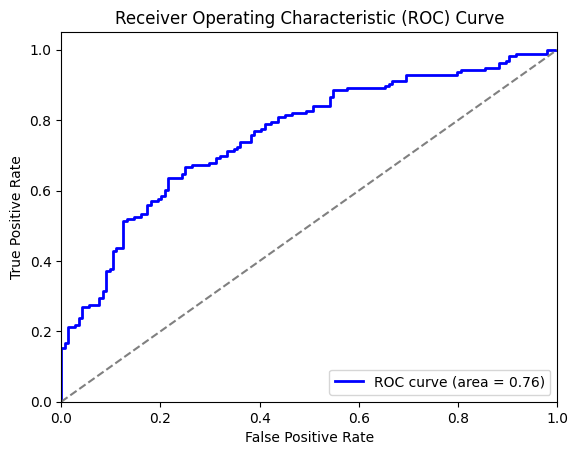

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=2,
    class_sep=0.5,
    flip_y=0.1,
    random_state=42,
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测概率
y_score = model.predict_proba(X_test)[:, 1]  # 取正类的概率

# 计算 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# 计算 AUC
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame(
    {
        "thresholds": thresholds,
        "FPR": fpr,
        "TPR": tpr,
    }
)
display(roc_df)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color="b", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()